In [ ]:
!pip install seaborn
!pip install -U scikit-learn
!pip install wandb

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import logging
import tempfile
import os
import wandb
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

/bin/bash: line 1: wandb: command not found


In [ ]:
#Set artifacts name

artifact_input_name = "students_adaptability/train.csv:latest"

artifact_type = "segregated_data"

In [ ]:
# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

# initiate wandb project
run = wandb.init(project="students_adaptability", job_type="train_data")

logger.info("Downloading and reading artifact")
artifact = run.use_artifact(artifact_input_name)
artifact_path = artifact.file()
df = pd.read_csv(artifact_path)

wandb: Currently logged in as: natalia-simoes (flateam). Use `wandb login --relogin` to force relogin


In [ ]:
df.dtypes

Gender                 int64
Age                    int64
Education Level        int64
Institution Type       int64
IT Student             int64
Location               int64
Load-shedding          int64
Financial Condition    int64
Internet Type          int64
Network Type           int64
Class Duration         int64
Self Lms               int64
Device                 int64
Adaptivity Level       int64
dtype: object

In [ ]:
#Remove outliers
x = df.select_dtypes("int64").copy()

lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1

In [ ]:
df = df.loc[mask,:].copy()

In [ ]:
labels = df['Adaptivity Level']

data = df[["Gender", "Age", "Education Level", "Institution Type", "IT Student", "Location", "Load-shedding", "Financial Condition", "Internet Type","Network Type",
           "Class Duration", "Self Lms", "Device"]]

data = data.values


In [ ]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = None)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=10)

In [ ]:
import pickle
with open("model_kmeans.pkl", "wb") as f:
  pickle.dump(kmeans, f)

In [ ]:
import pickle
with open("model_kmeans.pkl", "rb") as f:
  kmeans = pickle.load(f)

In [ ]:
y_kmeans = kmeans.predict(data)
y_kmeans

array([0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2,
       1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0,
       2, 1, 2], dtype=int32)

In [ ]:
accuracy = accuracy_score(labels.values, y_kmeans)
print(accuracy)

0.3128491620111732


In [ ]:
#send the raw_data.csv to wandb

!wandb artifact put \
      --name students_adaptability/model_kmeans.pkl \
      --type model \
      --description "K-means Model for Students Adaptability " model_kmeans.pkl

In [ ]:
run.finish()

## PCA

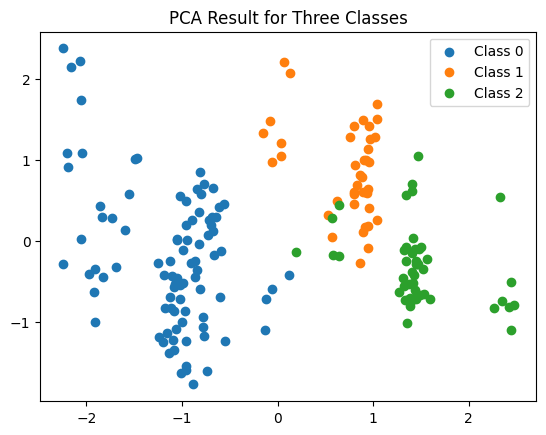

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(df)

pca_2d = pca.transform(df)


for label in set(labels):
    plt.scatter(pca_2d[y_kmeans == label, 0], pca_2d[y_kmeans == label, 1], label=f'Class {label}')

plt.title('PCA Result for Three Classes')
plt.legend()

plt.show()